In [56]:
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from scipy.special import softmax
from plotting import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
src = "../data/train-images-idx3-ubyte.gz"
with gzip.open(src, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
X = data.reshape(data.shape[0], 28*28).astype(np.float64)[:100]
X = (X - np.min(X)) / (np.max(X) - np.min(X))
first_ten_idx = [1,3,5,7,9,0,13,15,17,4]

In [58]:
pca = PCA(n_components=68)
X_pca = pca.fit_transform(X)
X_pca_normalized = (X_pca - np.min(X_pca)) / (np.max(X_pca) - np.min(X_pca))

In [59]:
data_pca = X_pca_normalized[first_ten_idx][:6].T
print(data_pca.shape)

(68, 6)


In [60]:
f = open('../mnist_pca6','ab')
pickle.dump(data_pca,f)
f.close()

In [91]:
fbp = open('../mnist6_bptt_7','rb')
dbp = pickle.load(fbp)
fbp.close()

flc = open('../mnist6_local_7','rb')
dlc = pickle.load(flc)
flc.close()

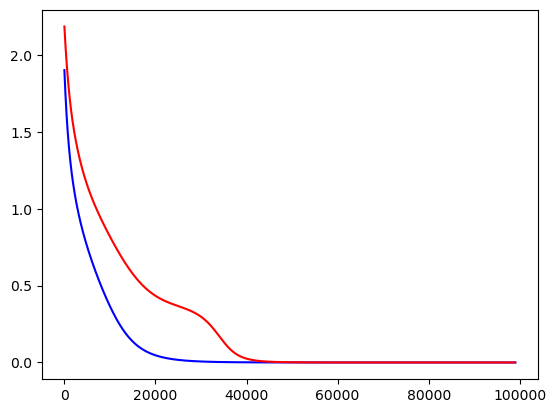

In [111]:
plt.plot(dbp['loss_list'][1000:],color='b')
plt.plot(dlc['loss_list'][1000:],color='r')
#plt.yscale('log')
plt.show()

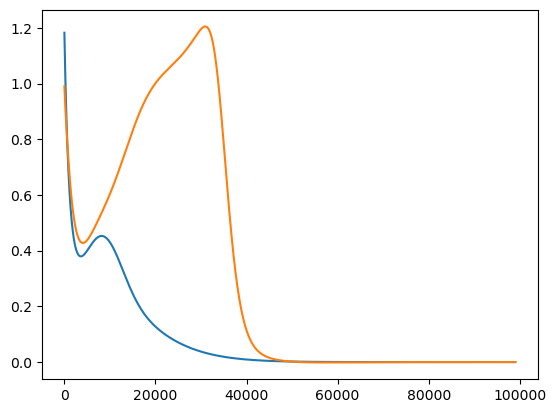

In [112]:
i=0
plt.plot(dbp['grad_list'][i][1000:])
plt.plot(dlc['grad_list'][i][1000:])
plt.show()

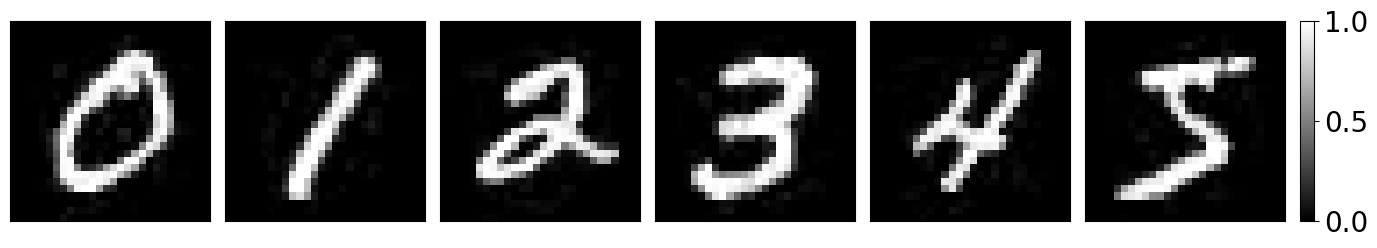

In [94]:
X_revpca = pca.inverse_transform(X_pca[first_ten_idx][:6])
plot_digits_grid(X_revpca)

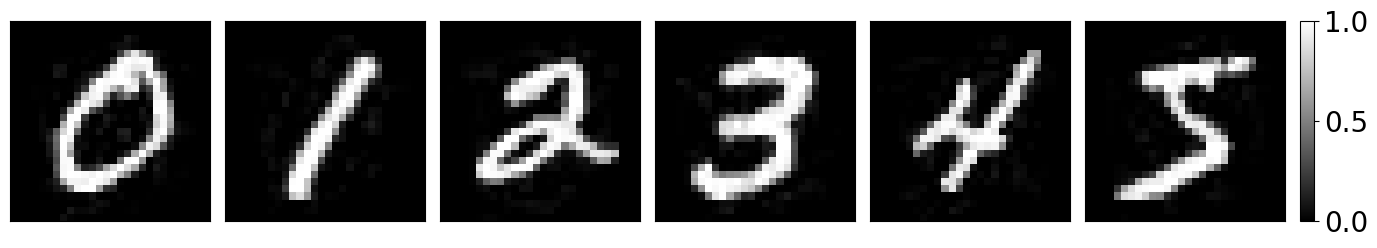

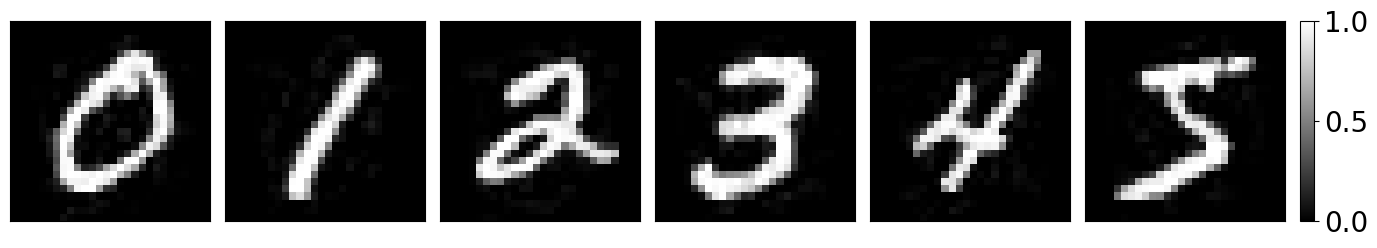

In [95]:
X_rec_pca_bp = dbp['output_rep'][-1].T
X_rec_pca_lc = dlc['output_rep'][-1].T
X_rec_lc = pca.inverse_transform((np.max(X_pca) - np.min(X_pca))*X_rec_pca_lc + np.min(X_pca))
X_rec_bp = pca.inverse_transform((np.max(X_pca) - np.min(X_pca))*X_rec_pca_bp + np.min(X_pca))
plot_digits_grid(X_rec_bp)
plot_digits_grid(X_rec_lc)

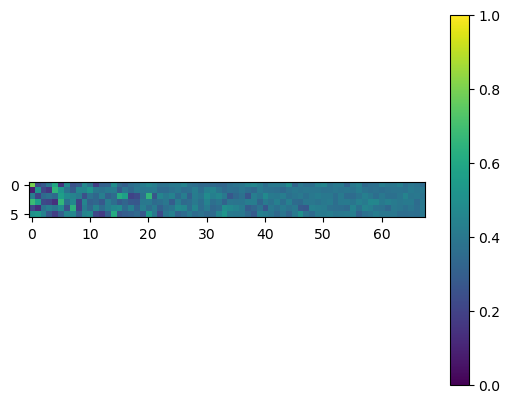

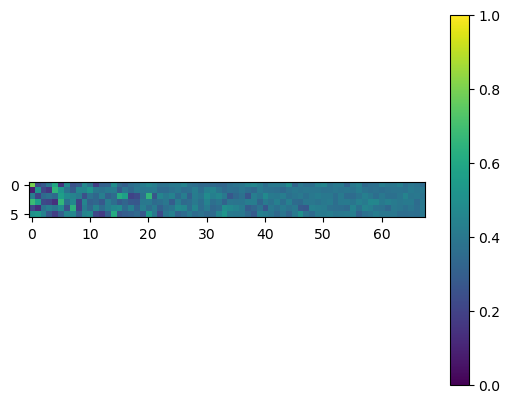

In [96]:
plt.imshow(dlc['output_rep'][-1].T)
plt.clim(0,1)
plt.colorbar()
plt.show()

plt.imshow(data_pca.T)
plt.clim(0,1)
plt.colorbar()
plt.show()

In [102]:
h_seq_lc, y_hat_lc, L = dlc['net'].forward_propagation(data_pca,np.zeros((100)), closed=True)
h_seq_bp, y_hat_bp, L = dbp['net'].forward_propagation(data_pca,np.zeros((100)), closed=True)

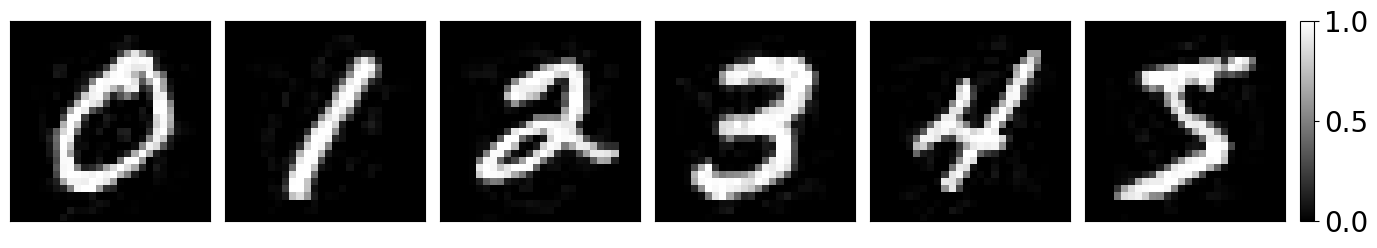

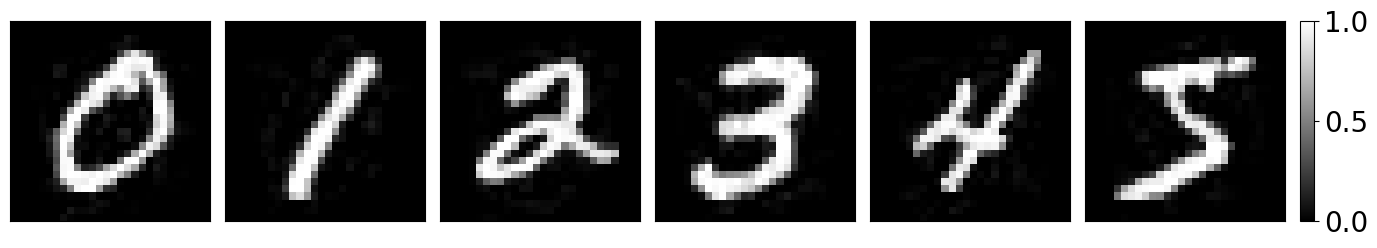

In [103]:
y_hat_lc_ = pca.inverse_transform((np.max(X_pca) - np.min(X_pca))*y_hat_lc.T + np.min(X_pca))
y_hat_bp_ = pca.inverse_transform((np.max(X_pca) - np.min(X_pca))*y_hat_bp.T + np.min(X_pca))
plot_digits_grid(y_hat_bp_)
plot_digits_grid(y_hat_lc_)